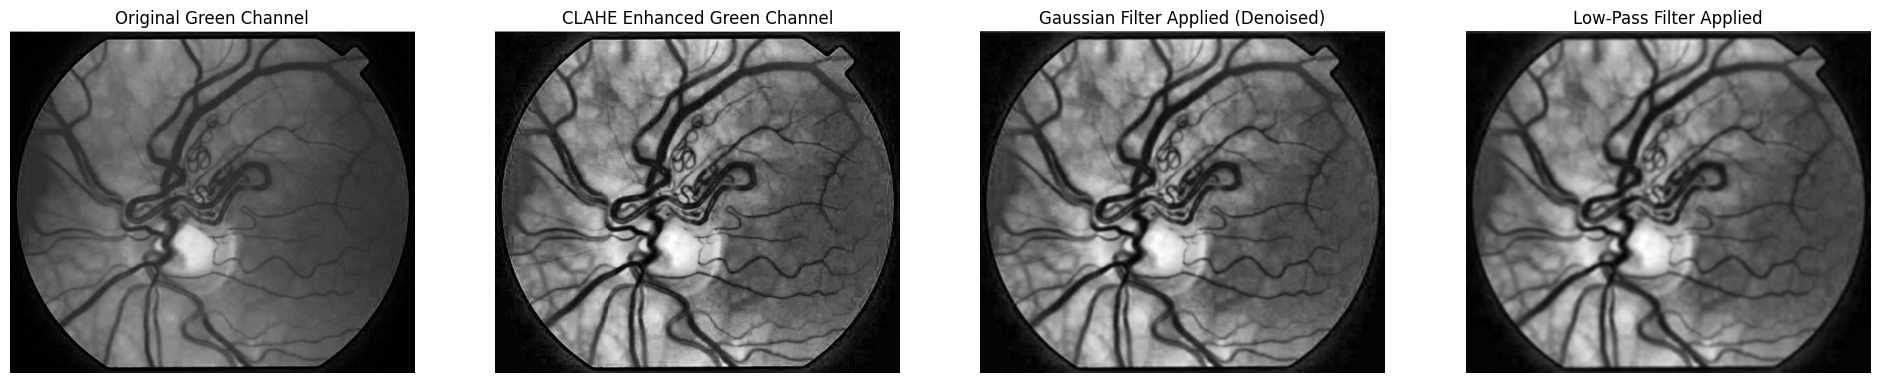

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\thooy\Downloads\Evaluation_Set\tileshop.jpeg"  # Replace with your image path
image = cv2.imread(image_path)

# Split the image into its channels
b, g, r = cv2.split(image)

# Apply CLAHE to the green channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
clahe_green = clahe.apply(g)

# Apply Gaussian filter to reduce noise
gaussian_blur = cv2.GaussianBlur(clahe_green, (5, 5), 0)

# Apply a low-pass spatial filter (box filter)
kernel = np.ones((5, 5), np.float32) / 25  # 5x5 kernel for low-pass filtering
low_pass_filtered = cv2.filter2D(gaussian_blur, -1, kernel)

# Display the original, CLAHE-enhanced, Gaussian-filtered, and low-pass-filtered green channel
plt.figure(figsize=(24, 6))

plt.subplot(1, 4, 1)
plt.title('Original Green Channel')
plt.imshow(g, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('CLAHE Enhanced Green Channel')
plt.imshow(clahe_green, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Gaussian Filter Applied (Denoised)')
plt.imshow(gaussian_blur, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Low-Pass Filter Applied')
plt.imshow(low_pass_filtered, cmap='gray')
plt.axis('off')

plt.show()


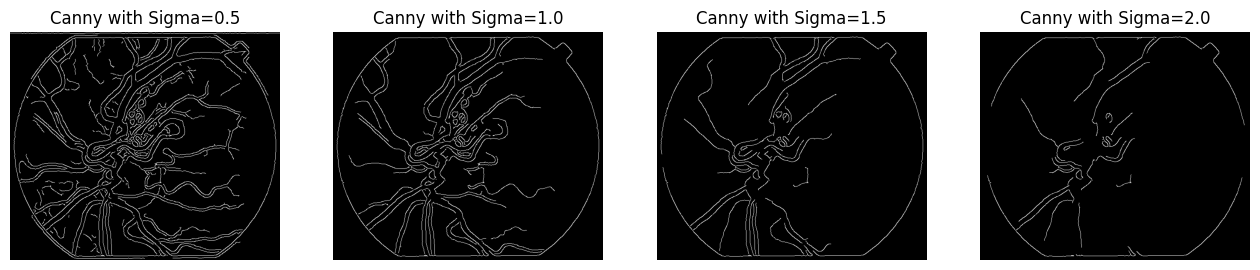

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image  # Replace with your image path
image = cv2.imread(image_path)

# Split the image into its channels
b, g, r = cv2.split(image)

# Apply CLAHE to the green channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
clahe_green = clahe.apply(g)

# Apply Gaussian filter to reduce noise
gaussian_blur = cv2.GaussianBlur(clahe_green, (5, 5), 0)

# Apply a low-pass spatial filter (box filter)
kernel = np.ones((5, 5), np.float32) / 25  # 5x5 kernel for low-pass filtering
low_pass_filtered = cv2.filter2D(gaussian_blur, -1, kernel)

# Function to apply Canny edge detection for varying sigma values
def apply_canny_sigma(image, sigma_values):
    edges_list = []
    for sigma in sigma_values:
        # Use different thresholds for each sigma value (tuned for visual clarity)
        lower_threshold = max(0, int(50 * sigma))
        upper_threshold = min(255, int(150 * sigma))
        
        # Apply Canny edge detection
        edges = cv2.Canny(image, lower_threshold, upper_threshold)
        edges_list.append(edges)
    
    return edges_list

# Define sigma values to test
sigma_values = [0.5, 1.0, 1.5, 2.0]

# Apply Canny edge detection with varying sigma values
edges_variants = apply_canny_sigma(low_pass_filtered, sigma_values)

# Display the results
plt.figure(figsize=(16, 8))

for i, sigma in enumerate(sigma_values):
    plt.subplot(1, len(sigma_values), i + 1)
    plt.title(f'Canny with Sigma={sigma}')
    plt.imshow(edges_variants[i], cmap='gray')
    plt.axis('off')

plt.show()



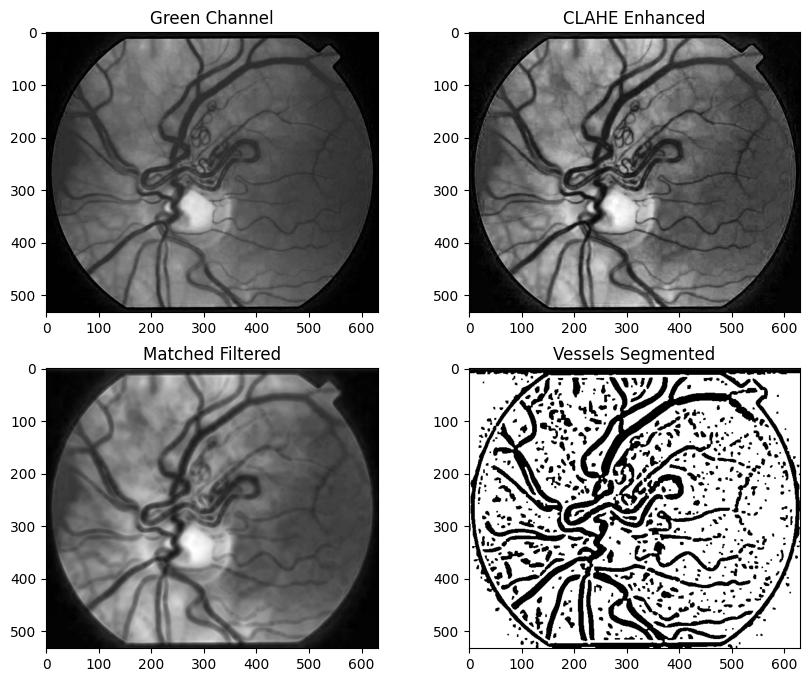

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the retinal image
# Load the image
image_path = r"C:\Users\thooy\Downloads\Evaluation_Set\tileshop.jpeg"  # Replace with your image path
image = cv2.imread(image_path)

# Convert to grayscale and extract the green channel
green_channel = image[:, :, 1]

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_green_channel = clahe.apply(green_channel)

# Apply Gaussian Blur for noise reduction
blurred = cv2.GaussianBlur(enhanced_green_channel, (5, 5), 0)

# Matched Filtering to capture vessels with varying orientations and thickness
def matched_filter(image, kernel_sizes=[9, 15, 21], sigma=2, num_angles=24):
    filtered_images = []
    for kernel_size in kernel_sizes:
        for angle in range(num_angles):
            # Create a line filter at different angles
            theta = np.deg2rad(angle * 180 / num_angles)
            kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
            filtered_image = cv2.filter2D(image, cv2.CV_32F, kernel)
            filtered_images.append(filtered_image)
    
    # Take the maximum response across all angles and kernel sizes
    return np.max(np.array(filtered_images), axis=0)

matched_filtered_image = matched_filter(blurred)

# Normalize the image for better contrast
matched_filtered_image = cv2.normalize(matched_filtered_image, None, 0, 255, cv2.NORM_MINMAX)

# Adaptive Thresholding for vessel segmentation
vessels_segmented = cv2.adaptiveThreshold(
    matched_filtered_image.astype(np.uint8), 
    255, 
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY, 
    11, 
    2
)

# Morphological operations to clean up the segmentation
kernel = np.ones((3, 3), np.uint8)
vessels_cleaned = cv2.morphologyEx(vessels_segmented, cv2.MORPH_CLOSE, kernel)
vessels_cleaned = cv2.morphologyEx(vessels_cleaned, cv2.MORPH_OPEN, kernel)

# Optionally apply edge detection
edges = cv2.Canny(vessels_cleaned, 50, 150)

# Display results
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1), plt.imshow(green_channel, cmap='gray'), plt.title('Green Channel')
plt.subplot(2, 2, 2), plt.imshow(enhanced_green_channel, cmap='gray'), plt.title('CLAHE Enhanced')
plt.subplot(2, 2, 3), plt.imshow(matched_filtered_image, cmap='gray'), plt.title('Matched Filtered')
plt.subplot(2, 2, 4), plt.imshow(vessels_cleaned, cmap='gray'), plt.title('Vessels Segmented')
plt.show()


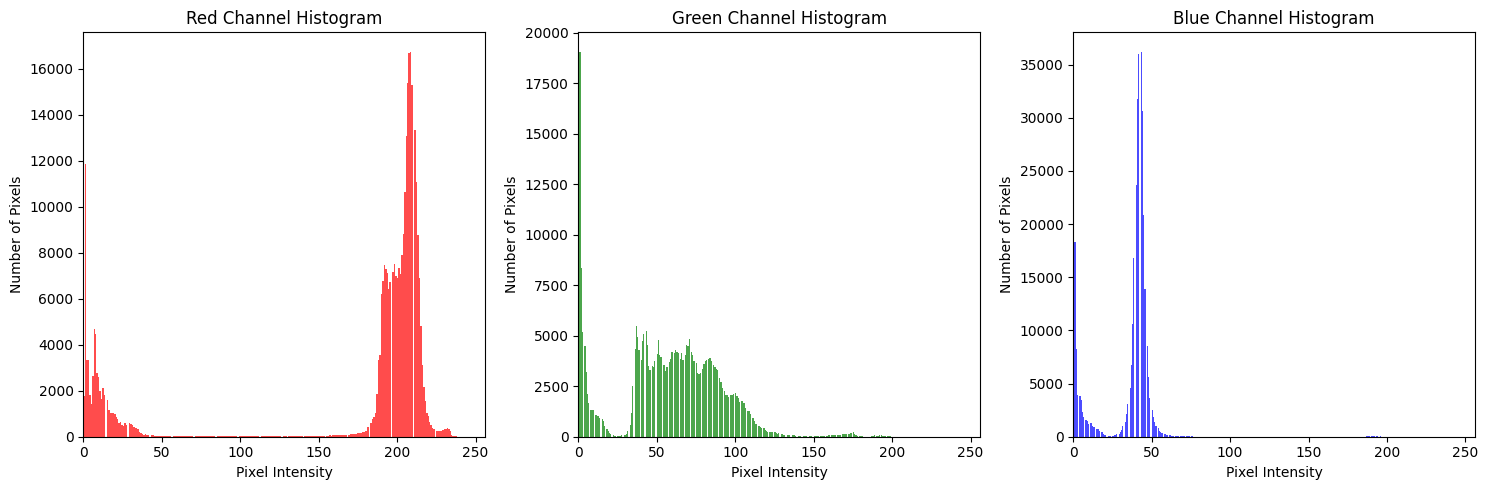

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread( r"C:\Users\thooy\Downloads\Evaluation_Set\tileshop.jpeg" )

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into Red, Green, and Blue channels
r, g, b = cv2.split(image)

# Set up the figure for histograms
plt.figure(figsize=(15, 5))

# Plot Red channel histogram
plt.subplot(1, 3, 1)
plt.hist(r.ravel(), bins=256, color='red', alpha=0.7)
plt.title('Red Channel Histogram')
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')

# Plot Green channel histogram
plt.subplot(1, 3, 2)
plt.hist(g.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Green Channel Histogram')
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')

# Plot Blue channel histogram
plt.subplot(1, 3, 3)
plt.hist(b.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Blue Channel Histogram')
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')

# Show the histograms
plt.tight_layout()
plt.show()


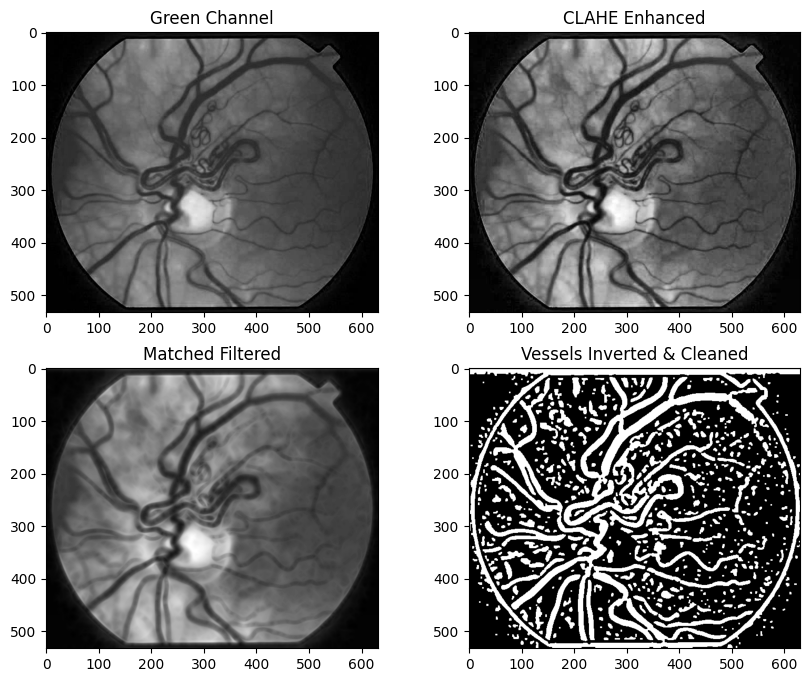

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

 # Make sure to provide the correct image path

# Convert to grayscale and extract the green channel
green_channel = image[:, :, 1]

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_green_channel = clahe.apply(green_channel)

# Apply Gaussian Blur for noise reduction
blurred = cv2.GaussianBlur(enhanced_green_channel, (5, 5), 0)

# Matched Filtering to capture vessels with varying orientations and thickness
def matched_filter(image, kernel_sizes=[9, 15, 21], sigma=2, num_angles=24):
    filtered_images = []
    for kernel_size in kernel_sizes:
        for angle in range(num_angles):
            # Create a line filter at different angles
            theta = np.deg2rad(angle * 180 / num_angles)
            kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
            filtered_image = cv2.filter2D(image, cv2.CV_32F, kernel)
            filtered_images.append(filtered_image)
    
    # Take the maximum response across all angles and kernel sizes
    return np.max(np.array(filtered_images), axis=0)

matched_filtered_image = matched_filter(blurred)

# Normalize the image for better contrast
matched_filtered_image = cv2.normalize(matched_filtered_image, None, 0, 255, cv2.NORM_MINMAX)

# Adaptive Thresholding for vessel segmentation
vessels_segmented = cv2.adaptiveThreshold(
    matched_filtered_image.astype(np.uint8), 
    255, 
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY, 
    11, 
    2
)

# Invert the segmented vessels to make them white on a black background
vessels_inverted = cv2.bitwise_not(vessels_segmented)

# Morphological operations to clean up the segmentation
kernel = np.ones((3, 3), np.uint8)
vessels_cleaned = cv2.morphologyEx(vessels_inverted, cv2.MORPH_CLOSE, kernel)
vessels_cleaned = cv2.morphologyEx(vessels_cleaned, cv2.MORPH_OPEN, kernel)

# Optionally apply edge detection
edges = cv2.Canny(vessels_cleaned, 50, 150)

# Display results
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1), plt.imshow(green_channel, cmap='gray'), plt.title('Green Channel')
plt.subplot(2, 2, 2), plt.imshow(enhanced_green_channel, cmap='gray'), plt.title('CLAHE Enhanced')
plt.subplot(2, 2, 3), plt.imshow(matched_filtered_image, cmap='gray'), plt.title('Matched Filtered')
plt.subplot(2, 2, 4), plt.imshow(vessels_cleaned, cmap='gray'), plt.title('Vessels Inverted & Cleaned')
plt.show()


In [19]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from matplotlib import pyplot as plt

# Paths to the image and mask directories
image_dir = r"C:\projects\ip\Data\train\image" # Replace with actual path
mask_dir = r"C:\projects\ip\Data\train\mask"  # Replace with actual path

# Helper function to calculate PSNR
def calculate_psnr(original, processed):
    mse = np.mean((original - processed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

# Helper function to calculate SSIM
def calculate_ssim(original, processed):
    return ssim(original, processed, data_range=processed.max() - processed.min())

# Helper function to calculate RMSE
def calculate_rmse(segmented, ground_truth):
    return np.sqrt(np.mean((segmented - ground_truth) ** 2))

# Matched Filtering to capture vessels with varying orientations and thickness
def matched_filter(image, kernel_sizes=[9, 15, 21], sigma=2, num_angles=24):
    filtered_images = []
    for kernel_size in kernel_sizes:
        for angle in range(num_angles):
            theta = np.deg2rad(angle * 180 / num_angles)
            kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
            filtered_image = cv2.filter2D(image, cv2.CV_32F, kernel)
            filtered_images.append(filtered_image)
    
    return np.max(np.array(filtered_images), axis=0)

# Lists to store PSNR, SSIM, and RMSE values for all images
psnr_clahe_values = []
ssim_clahe_values = []
psnr_matched_values = []
ssim_matched_values = []
rmse_values = []

# Iterate through all images in the image directory
for image_filename in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_filename)
    image = cv2.imread(image_path)

    # Corresponding mask file path
    mask_filename = image_filename  # Assuming the mask has the same filename as the image
    mask_path = os.path.join(mask_dir, mask_filename)

    # Load the mask image
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Process only if the image and mask are loaded successfully
    if image is not None and mask is not None:
        green_channel = image[:, :, 1]  # Extract the green channel

        # CLAHE (Contrast Limited Adaptive Histogram Equalization)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        enhanced_green_channel = clahe.apply(green_channel)

        # Apply Gaussian Blur for noise reduction
        blurred = cv2.GaussianBlur(enhanced_green_channel, (5, 5), 0)

        # Matched Filtering
        matched_filtered_image = matched_filter(blurred)
        matched_filtered_image = cv2.normalize(matched_filtered_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        # Adaptive Thresholding for vessel segmentation
        vessels_segmented = cv2.adaptiveThreshold(
            matched_filtered_image, 
            255, 
            cv2.ADAPTIVE_THRESH_MEAN_C, 
            cv2.THRESH_BINARY, 
            11, 
            2
        )

        # Invert the segmented vessels to make them white on a black background
        vessels_inverted = cv2.bitwise_not(vessels_segmented)

        # Morphological operations to clean up the segmentation
        kernel = np.ones((3, 3), np.uint8)
        vessels_cleaned = cv2.morphologyEx(vessels_inverted, cv2.MORPH_CLOSE, kernel)
        vessels_cleaned = cv2.morphologyEx(vessels_cleaned, cv2.MORPH_OPEN, kernel)
S
        # Calculate PSNR and SSIM for CLAHE-enhanced image
        psnr_clahe = calculate_psnr(green_channel, enhanced_green_channel)
        ssim_clahe = calculate_ssim(green_channel, enhanced_green_channel)

        # Calculate PSNR and SSIM for matched-filtered image
        psnr_matched = calculate_psnr(green_channel, matched_filtered_image)
        ssim_matched = calculate_ssim(green_channel, matched_filtered_image)

        # Calculate RMSE between the final segmented vessel image and the ground truth mask
        rmse_value = calculate_rmse(vessels_cleaned, mask)

        # Append values to the lists
        psnr_clahe_values.append(psnr_clahe)
        ssim_clahe_values.append(ssim_clahe)
        psnr_matched_values.append(psnr_matched)
        ssim_matched_values.append(ssim_matched)
        rmse_values.append(rmse_value)

        # Optionally display the current image processing step
        print(f"Processed image: {image_filename}")
        print(f"PSNR (CLAHE): {psnr_clahe:.2f}, SSIM (CLAHE): {ssim_clahe:.4f}")
        print(f"PSNR (Matched Filter): {psnr_matched:.2f}, SSIM (Matched Filter): {ssim_matched:.4f}")
        print(f"RMSE (Final Vessel Segmentation vs Ground Truth): {rmse_value:.4f}\n")

# Calculate the average PSNR, SSIM, and RMSE values across all images
avg_psnr_clahe = np.mean(psnr_clahe_values)
avg_ssim_clahe = np.mean(ssim_clahe_values)
avg_psnr_matched = np.mean(psnr_matched_values)
avg_ssim_matched = np.mean(ssim_matched_values)
avg_rmse = np.mean(rmse_values)

# Display average values
print(f"Average PSNR (CLAHE): {avg_psnr_clahe:.2f}")
print(f"Average SSIM (CLAHE): {avg_ssim_clahe:.4f}")
print(f"Average PSNR (Matched Filter): {avg_psnr_matched:.2f}")
print(f"Average SSIM (Matched Filter): {avg_ssim_matched:.4f}")
print(f"Average RMSE (Final Vessel Segmentation vs Ground Truth): {avg_rmse:.4f}")


Processed image: 0.png
PSNR (CLAHE): 28.44, SSIM (CLAHE): 0.7959
PSNR (Matched Filter): 29.45, SSIM (Matched Filter): 0.8394
RMSE (Final Vessel Segmentation vs Ground Truth): 2.5851

Processed image: 1.png
PSNR (CLAHE): 28.43, SSIM (CLAHE): 0.7958
PSNR (Matched Filter): 29.43, SSIM (Matched Filter): 0.8395
RMSE (Final Vessel Segmentation vs Ground Truth): 2.5839

Processed image: 10.png
PSNR (CLAHE): 28.70, SSIM (CLAHE): 0.7867
PSNR (Matched Filter): 29.11, SSIM (Matched Filter): 0.8118
RMSE (Final Vessel Segmentation vs Ground Truth): 2.2477

Processed image: 11.png
PSNR (CLAHE): 28.55, SSIM (CLAHE): 0.7966
PSNR (Matched Filter): 28.66, SSIM (Matched Filter): 0.8074
RMSE (Final Vessel Segmentation vs Ground Truth): 2.4196

Processed image: 12.png
PSNR (CLAHE): 28.51, SSIM (CLAHE): 0.7917
PSNR (Matched Filter): 28.79, SSIM (Matched Filter): 0.8191
RMSE (Final Vessel Segmentation vs Ground Truth): 3.0048

Processed image: 13.png
PSNR (CLAHE): 28.52, SSIM (CLAHE): 0.7917
PSNR (Matched Fi

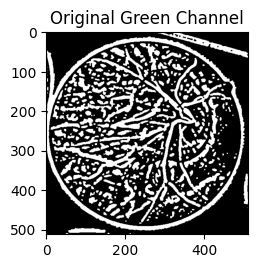

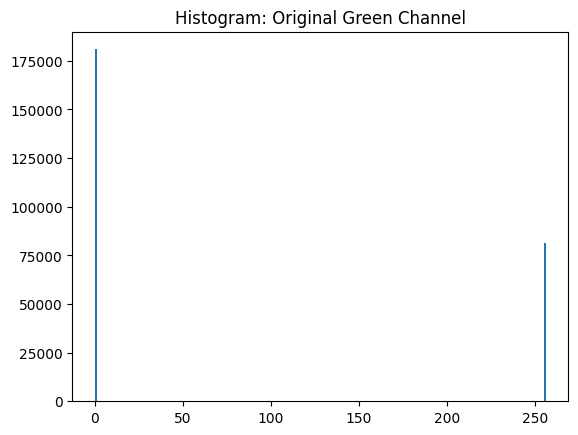

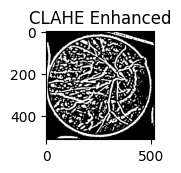

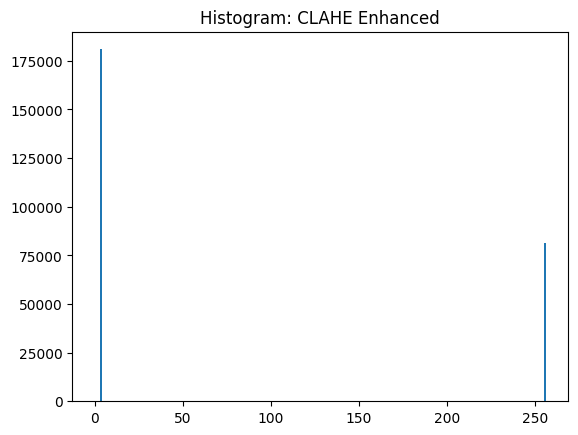

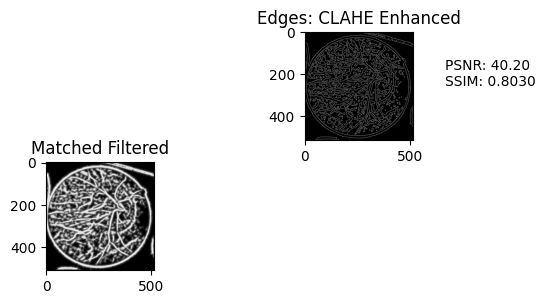

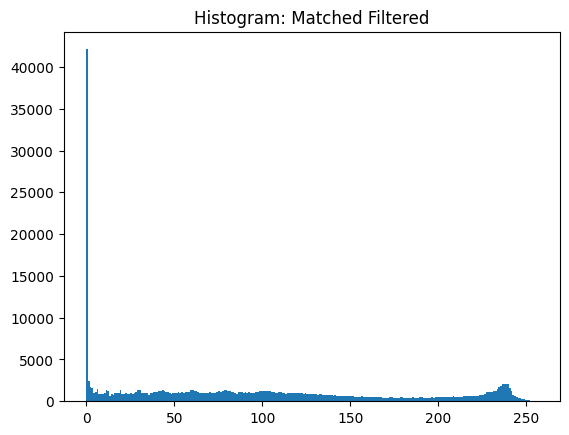

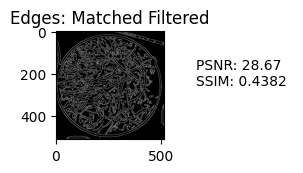

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Load the image (make sure to provide the correct image path)
image = cv2.imread(image_path)  # Replace with actual path

# Convert to grayscale and extract the green channel
green_channel = image[:, :, 1]

# Helper functions to calculate PSNR and SSIM
def calculate_psnr(original, processed):
    mse = np.mean((original - processed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

def calculate_ssim(original, processed):
    return ssim(original, processed, data_range=processed.max() - processed.min())

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_green_channel = clahe.apply(green_channel)

# Apply Gaussian Blur for noise reduction
blurred = cv2.GaussianBlur(enhanced_green_channel, (5, 5), 0)

# Matched Filtering to capture vessels with varying orientations and thickness
def matched_filter(image, kernel_sizes=[9, 15, 21], sigma=2, num_angles=24):
    filtered_images = []
    for kernel_size in kernel_sizes:
        for angle in range(num_angles):
            # Create a line filter at different angles
            theta = np.deg2rad(angle * 180 / num_angles)
            kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
            filtered_image = cv2.filter2D(image, cv2.CV_32F, kernel)
            filtered_images.append(filtered_image)
    
    # Take the maximum response across all angles and kernel sizes
    return np.max(np.array(filtered_images), axis=0)

matched_filtered_image = matched_filter(blurred)

# Normalize the matched filtered image for better contrast
matched_filtered_image = cv2.normalize(matched_filtered_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Edge detection for each step
edges_clahe = cv2.Canny(enhanced_green_channel, 50, 150)
edges_matched = cv2.Canny(matched_filtered_image, 50, 150)

# Calculate PSNR and SSIM for CLAHE and Matched Filtering
psnr_clahe = calculate_psnr(green_channel, enhanced_green_channel)
ssim_clahe = calculate_ssim(green_channel, enhanced_green_channel)

psnr_matched = calculate_psnr(green_channel, matched_filtered_image)
ssim_matched = calculate_ssim(green_channel, matched_filtered_image)

# Helper function to plot histograms
def plot_histogram(image, title):
    plt.figure()
    plt.hist(image.ravel(), 256, [0, 256])
    plt.title(f"Histogram: {title}")
    plt.show()

# Plotting the original image and after each step
plt.figure(figsize=(12, 10))

# Original Image and Histogram
plt.subplot(3, 4, 1), plt.imshow(green_channel, cmap='gray'), plt.title('Original Green Channel')
plot_histogram(green_channel, "Original Green Channel")

# CLAHE Enhanced and its Histogram
plt.subplot(3, 4, 2), plt.imshow(enhanced_green_channel, cmap='gray'), plt.title('CLAHE Enhanced')
plot_histogram(enhanced_green_channel, "CLAHE Enhanced")
plt.subplot(3, 4, 3), plt.imshow(edges_clahe, cmap='gray'), plt.title('Edges: CLAHE Enhanced')
plt.subplot(3, 4, 4), plt.text(0.1, 0.5, f"PSNR: {psnr_clahe:.2f}\nSSIM: {ssim_clahe:.4f}"), plt.axis('off')

# Matched Filter and its Histogram
plt.subplot(3, 4, 5), plt.imshow(matched_filtered_image, cmap='gray'), plt.title('Matched Filtered')
plot_histogram(matched_filtered_image, "Matched Filtered")
plt.subplot(3, 4, 6), plt.imshow(edges_matched, cmap='gray'), plt.title('Edges: Matched Filtered')
plt.subplot(3, 4, 7), plt.text(0.1, 0.5, f"PSNR: {psnr_matched:.2f}\nSSIM: {ssim_matched:.4f}"), plt.axis('off')

plt.show()


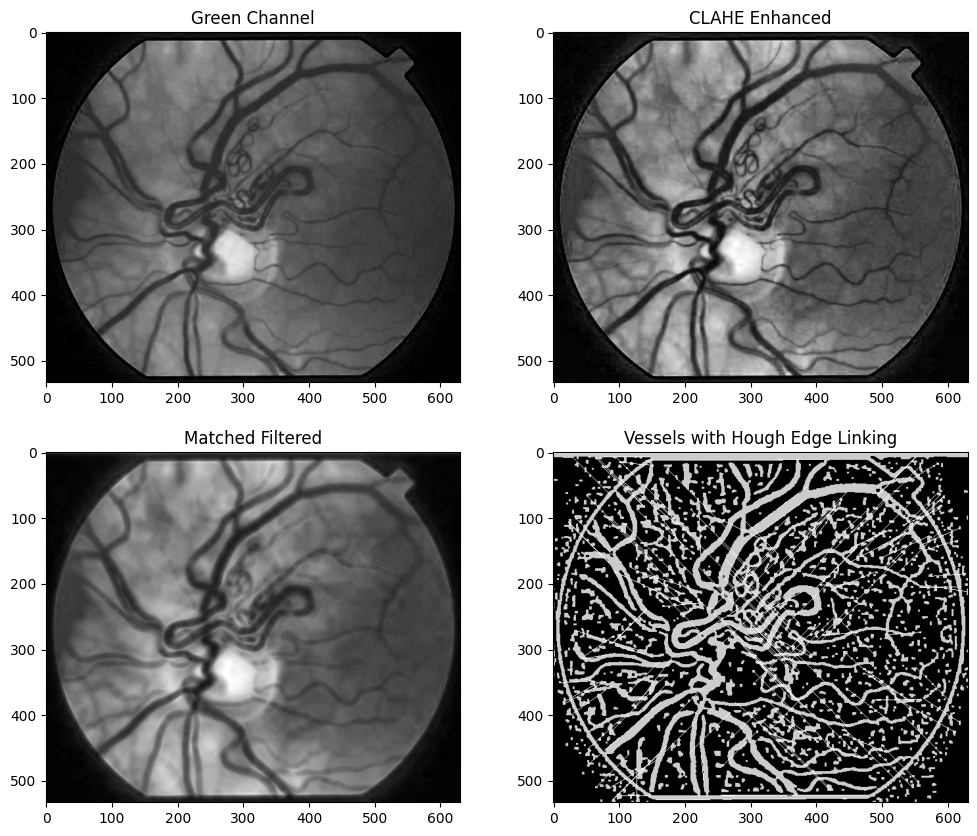

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Ensure to provide the correct image path and load the image properly
# Load the image
image_path = r"C:\Users\thooy\Downloads\Evaluation_Set\tileshop.jpeg"  # Replace with your image path
image = cv2.imread(image_path)# Load the input image

# Convert to grayscale and extract the green channel
green_channel = image[:, :, 1]

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_green_channel = clahe.apply(green_channel)

# Apply Gaussian Blur for noise reduction
blurred = cv2.GaussianBlur(enhanced_green_channel, (5, 5), 0)

# Matched Filtering to capture vessels with varying orientations and thickness
def matched_filter(image, kernel_sizes=[9, 15, 21], sigma=2, num_angles=24):
    filtered_images = []
    for kernel_size in kernel_sizes:
        for angle in range(num_angles):
            # Create a line filter at different angles
            theta = np.deg2rad(angle * 180 / num_angles)
            kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
            filtered_image = cv2.filter2D(image, cv2.CV_32F, kernel)
            filtered_images.append(filtered_image)
    
    # Take the maximum response across all angles and kernel sizes
    return np.max(np.array(filtered_images), axis=0)

matched_filtered_image = matched_filter(blurred)

# Normalize the image for better contrast
matched_filtered_image = cv2.normalize(matched_filtered_image, None, 0, 255, cv2.NORM_MINMAX)

# Adaptive Thresholding for vessel segmentation
vessels_segmented = cv2.adaptiveThreshold(
    blurred.astype(np.uint8), 
    255, 
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY, 
    11, 
    2
)

# Invert the segmented vessels to make them white on a black background
vessels_inverted = cv2.bitwise_not(vessels_segmented)

# Morphological operations to clean up the segmentation
kernel = np.ones((3, 3), np.uint8)
vessels_cleaned = cv2.morphologyEx(vessels_inverted, cv2.MORPH_CLOSE, kernel)
vessels_cleaned = cv2.morphologyEx(vessels_cleaned, cv2.MORPH_OPEN, kernel)

# Edge detection using Canny
edges = cv2.Canny(vessels_cleaned, 50, 150)

# Hough Line Transform to link edges
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)

# Create a blank image to draw the lines
line_image = np.zeros_like(image)

# Draw the detected lines
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 255, 255), 1)

# Combine the line image with the cleaned vessels image
combined_image = cv2.addWeighted(vessels_cleaned, 0.8, line_image[:, :, 1], 1, 0)

# Display results
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1), plt.imshow(green_channel, cmap='gray'), plt.title('Green Channel')
plt.subplot(2, 2, 2), plt.imshow(enhanced_green_channel, cmap='gray'), plt.title('CLAHE Enhanced')
plt.subplot(2, 2, 3), plt.imshow(matched_filtered_image, cmap='gray'), plt.title('Matched Filtered')
plt.subplot(2, 2, 4), plt.imshow(combined_image, cmap='gray'), plt.title('Vessels with Hough Edge Linking')
plt.show()


In [28]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# Function to load images from a directory
def load_image(file_path):
    return cv2.imread(file_path)

# Function to apply the segmentation method to find the vessel mask
def segment_vessels(image):
    # Convert to grayscale and extract the green channel
    green_channel = image[:, :, 1]

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_green_channel = clahe.apply(green_channel)

    # Apply Gaussian Blur for noise reduction
    blurred = cv2.GaussianBlur(enhanced_green_channel, (5, 5), 0)

    # Matched Filtering to capture vessels with varying orientations and thickness
    def matched_filter(image, kernel_sizes=[9, 15, 21], sigma=2, num_angles=24):
        filtered_images = []
        for kernel_size in kernel_sizes:
            for angle in range(num_angles):
                # Create a line filter at different angles
                theta = np.deg2rad(angle * 180 / num_angles)
                kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
                filtered_image = cv2.filter2D(image, cv2.CV_32F, kernel)
                filtered_images.append(filtered_image)

        # Take the maximum response across all angles and kernel sizes
        return np.max(np.array(filtered_images), axis=0)

    matched_filtered_image = matched_filter(blurred)

    # Normalize the image for better contrast
    matched_filtered_image = cv2.normalize(matched_filtered_image, None, 0, 255, cv2.NORM_MINMAX)

    # Adaptive Thresholding for vessel segmentation
    vessels_segmented = cv2.adaptiveThreshold(
        matched_filtered_image.astype(np.uint8),
        255,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        11,
        2
    )

    # Invert the segmented vessels to make them white on a black background
    vessels_inverted = cv2.bitwise_not(vessels_segmented)

    # Morphological operations to clean up the segmentation
    kernel = np.ones((3, 3), np.uint8)
    vessels_cleaned = cv2.morphologyEx(vessels_inverted, cv2.MORPH_CLOSE, kernel)
    vessels_cleaned = cv2.morphologyEx(vessels_cleaned, cv2.MORPH_OPEN, kernel)

    return vessels_cleaned

# Define the paths to input images and output masks
input_images_dir = r"C:\projects\ip\Data\train\image"  # Directory containing input images
output_masks_dir = r"C:\projects\ip\Data\train\pred_mask"   # Directory to save the predicted masks

# Create the output directory if it doesn't exist
if not os.path.exists(output_masks_dir):
    os.makedirs(output_masks_dir)

# Process each image in the input directory
for filename in os.listdir(input_images_dir):
    if filename.endswith('.png') or filename.endswith('.jpg'):  # Process only image files
        image_path = os.path.join(input_images_dir, filename)
        image = load_image(image_path)
        
        if image is not None:
            # Segment vessels and get the predicted mask
            predicted_mask = segment_vessels(image)

            # Save the predicted mask to the output directory
            mask_filename = os.path.join(output_masks_dir, filename)
            cv2.imwrite(mask_filename, predicted_mask)
            print(f"Processed {filename} and saved the mask.")
        else:
            print(f"Failed to load {filename}.")

print("All images processed.")


Processed 0.png and saved the mask.
Processed 1.png and saved the mask.
Processed 10.png and saved the mask.
Processed 11.png and saved the mask.
Processed 12.png and saved the mask.
Processed 13.png and saved the mask.
Processed 14.png and saved the mask.
Processed 15.png and saved the mask.
Processed 16.png and saved the mask.
Processed 17.png and saved the mask.
Processed 18.png and saved the mask.
Processed 19.png and saved the mask.
Processed 2.png and saved the mask.
Processed 20.png and saved the mask.
Processed 21.png and saved the mask.
Processed 22.png and saved the mask.
Processed 23.png and saved the mask.
Processed 24.png and saved the mask.
Processed 25.png and saved the mask.
Processed 26.png and saved the mask.
Processed 27.png and saved the mask.
Processed 28.png and saved the mask.
Processed 29.png and saved the mask.
Processed 3.png and saved the mask.
Processed 30.png and saved the mask.
Processed 31.png and saved the mask.
Processed 32.png and saved the mask.
Proce

Metrics for C:\projects\ip\Data\train\image\55.png: SSIM=0.0054, PSNR=28.6538


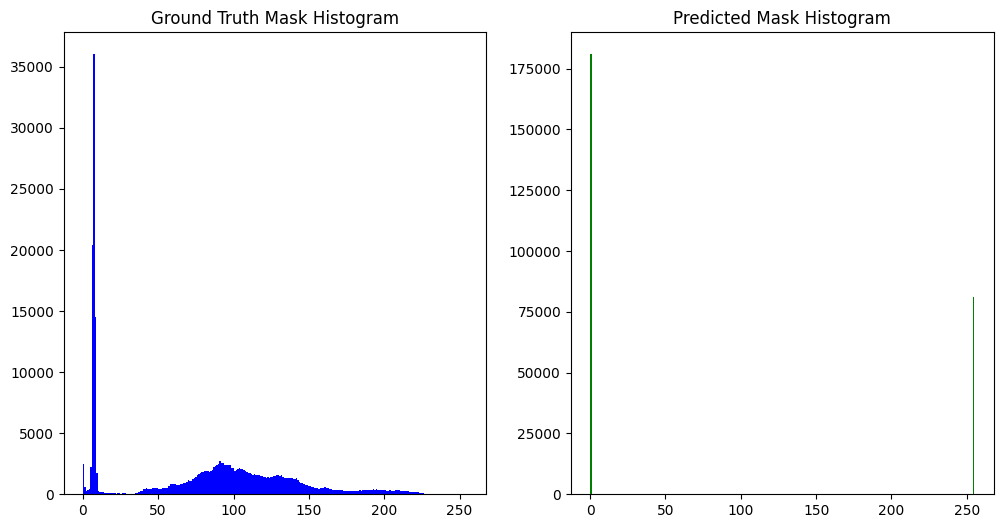

In [11]:
import cv2
import numpy as np
import os
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_ubyte
from matplotlib import pyplot as plt

# Function to load images from a directory
def load_image(file_path):
    return cv2.imread(file_path)

# Function to calculate SSIM and PSNR
def calculate_ssim_psnr(predicted_mask, ground_truth_mask):
    # Convert images to the same dtype
    predicted_mask_8bit = img_as_ubyte(predicted_mask)
    ground_truth_mask_8bit = img_as_ubyte(ground_truth_mask)

    # SSIM
    ssim_value, _ = ssim(predicted_mask_8bit, ground_truth_mask_8bit, full=True)

    # PSNR
    mse_value = np.mean((predicted_mask_8bit - ground_truth_mask_8bit) ** 2)
    psnr_value = 20 * np.log10(255 / np.sqrt(mse_value)) if mse_value != 0 else np.inf

    return ssim_value, psnr_value

# Function to apply Matched Filtering
def matched_filter(image, kernel_sizes=[9, 15, 21], sigma=2, num_angles=24):
    filtered_images = []
    for kernel_size in kernel_sizes:
        for angle in range(num_angles):
            theta = np.deg2rad(angle * 180 / num_angles)
            kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
            filtered_image = cv2.filter2D(image, cv2.CV_32F, kernel)
            filtered_images.append(filtered_image)

    return np.max(np.array(filtered_images), axis=0)

# Function to apply CLAHE and vessel segmentation
def segment_vessels(image):
    green_channel = image[:, :, 1]

    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_green_channel = clahe.apply(green_channel)

    # Gaussian Blur
    blurred = cv2.GaussianBlur(enhanced_green_channel, (5, 5), 0)

    # Apply Matched Filtering
    matched_filtered_image = matched_filter(blurred)

    # Normalize image
    matched_filtered_image = cv2.normalize(matched_filtered_image, None, 0, 255, cv2.NORM_MINMAX)

    # Adaptive Thresholding
    vessels_segmented = cv2.adaptiveThreshold(
        matched_filtered_image.astype(np.uint8),
        255,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        11,
        2
    )

    vessels_inverted = cv2.bitwise_not(vessels_segmented)

    # Morphological operations
    kernel = np.ones((3, 3), np.uint8)
    vessels_cleaned = cv2.morphologyEx(vessels_inverted, cv2.MORPH_CLOSE, kernel)
    vessels_cleaned = cv2.morphologyEx(vessels_cleaned, cv2.MORPH_OPEN, kernel)

    return vessels_cleaned

# Directory paths
input_images_dir = r"C:\projects\ip\Data\train\image"
output_masks_dir = r"C:\projects\ip\Data\train\pred_mask"
ground_truth_masks_dir = r"C:\projects\ip\Data\train\mask"

# Create the output directory if it doesn't exist
if not os.path.exists(output_masks_dir):
    os.makedirs(output_masks_dir)

# Example file for displaying histograms and metric comparison
example_filename = r"C:\projects\ip\Data\train\image\55.png"  # Replace with your actual image file

# Process the example image
image_path = os.path.join(input_images_dir, example_filename)
ground_truth_mask_path = os.path.join(ground_truth_masks_dir, example_filename)

image = load_image(image_path)
ground_truth_mask = cv2.imread(ground_truth_mask_path, cv2.IMREAD_GRAYSCALE)

if image is not None and ground_truth_mask is not None:
    # Segment vessels
    predicted_mask = segment_vessels(image)

    # Calculate SSIM and PSNR
    ssim_value, psnr_value = calculate_ssim_psnr(predicted_mask, ground_truth_mask)

    print(f"Metrics for {example_filename}: SSIM={ssim_value:.4f}, PSNR={psnr_value:.4f}")

    # Save the predicted mask
    mask_filename = os.path.join(output_masks_dir, example_filename)
    cv2.imwrite(mask_filename, predicted_mask)

    # Display histograms
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Ground Truth Mask Histogram")
    plt.hist(ground_truth_mask.ravel(), bins=256, range=(0, 255), color='blue')

    plt.subplot(1, 2, 2)
    plt.title("Predicted Mask Histogram")
    plt.hist(predicted_mask.ravel(), bins=256, range=(0, 255), color='green')
    plt.show()

else:
    print(f"Failed to load {example_filename}.")


In [30]:
import cv2
import numpy as np
import os

# Function to calculate performance metrics
def calculate_metrics(predicted_mask, ground_truth_mask):
    # Flatten the masks for easier calculations
    predicted_flat = predicted_mask.flatten()
    ground_truth_flat = ground_truth_mask.flatten()

    # Mean Error
    mean_error = np.mean(predicted_flat - ground_truth_flat)

    # Mean Squared Error
    mse = np.mean((predicted_flat - ground_truth_flat) ** 2)

    # Root Mean Squared Error
    rmse = np.sqrt(mse)

    # Accuracy
    accuracy = np.sum(predicted_flat == ground_truth_flat) / predicted_flat.size

    # Precision
    true_positive = np.sum((predicted_flat == 255) & (ground_truth_flat == 255))
    predicted_positive = np.sum(predicted_flat == 255)
    precision = true_positive / predicted_positive if predicted_positive != 0 else 0

    # Recall
    actual_positive = np.sum(ground_truth_flat == 255)
    recall = true_positive / actual_positive if actual_positive != 0 else 0

    return mean_error, mse, rmse, accuracy, precision, recall

# Define paths for the masks
predicted_masks_dir =r"C:\projects\ip\Data\train\image"  # Directory containing predicted masks
ground_truth_masks_dir = r"C:\projects\ip\Data\train\mask"  # Directory containing ground truth masks

# Initialize metric storage
metrics_list = []
total_metrics = np.zeros(6)  # For Mean Error, MSE, RMSE, Accuracy, Precision, Recall
num_images = 0

# Loop through each predicted mask and corresponding ground truth mask
for filename in os.listdir(predicted_masks_dir):
    if filename.endswith('.png') or filename.endswith('.jpg'):  # Process only image files
        predicted_mask_path = os.path.join(predicted_masks_dir, filename)
        ground_truth_mask_path = os.path.join(ground_truth_masks_dir, filename)

        predicted_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)
        ground_truth_mask = cv2.imread(ground_truth_mask_path, cv2.IMREAD_GRAYSCALE)

        if predicted_mask is not None and ground_truth_mask is not None:
            # Calculate metrics
            metrics = calculate_metrics(predicted_mask, ground_truth_mask)
            metrics_list.append((filename, metrics))
            total_metrics += metrics  # Accumulate metrics
            num_images += 1
            print(f"Metrics for {filename}: Mean Error={metrics[0]:.4f}, MSE={metrics[1]:.4f}, RMSE={metrics[2]:.4f}, Accuracy={metrics[3]:.4f}, Precision={metrics[4]:.4f}, Recall={metrics[5]:.4f}")
        else:
            print(f"Failed to load mask for {filename}.")

# Calculate mean metrics
if num_images > 0:
    mean_metrics = total_metrics / num_images
    print("\nAverage Metrics across all images:")
    print(f"Mean Error: {mean_metrics[0]:.4f}")
    print(f"MSE: {mean_metrics[1]:.4f}")
    print(f"RMSE: {mean_metrics[2]:.4f}")
    print(f"Accuracy: {mean_metrics[3]:.4f}")
    print(f"Precision: {mean_metrics[4]:.4f}")
    print(f"Recall: {mean_metrics[5]:.4f}")
else:
    print("No images processed.")


Metrics for 0.png: Mean Error=95.2903, MSE=74.6724, RMSE=8.6413, Accuracy=0.0150, Precision=0.0000, Recall=0.0000
Metrics for 1.png: Mean Error=95.2903, MSE=74.6724, RMSE=8.6413, Accuracy=0.0150, Precision=0.0000, Recall=0.0000
Metrics for 10.png: Mean Error=104.7861, MSE=91.7895, RMSE=9.5807, Accuracy=0.0154, Precision=0.0000, Recall=0.0000
Metrics for 11.png: Mean Error=116.3363, MSE=97.5829, RMSE=9.8784, Accuracy=0.0112, Precision=0.0000, Recall=0.0000
Metrics for 12.png: Mean Error=100.7436, MSE=84.5967, RMSE=9.1976, Accuracy=0.0142, Precision=0.0000, Recall=0.0000
Metrics for 13.png: Mean Error=100.7436, MSE=84.5967, RMSE=9.1976, Accuracy=0.0142, Precision=0.0000, Recall=0.0000
Metrics for 14.png: Mean Error=100.7436, MSE=84.5967, RMSE=9.1976, Accuracy=0.0142, Precision=0.0000, Recall=0.0000
Metrics for 15.png: Mean Error=100.8344, MSE=84.5929, RMSE=9.1974, Accuracy=0.0119, Precision=0.0000, Recall=0.0000
Metrics for 16.png: Mean Error=76.9552, MSE=85.3151, RMSE=9.2366, Accuracy=0

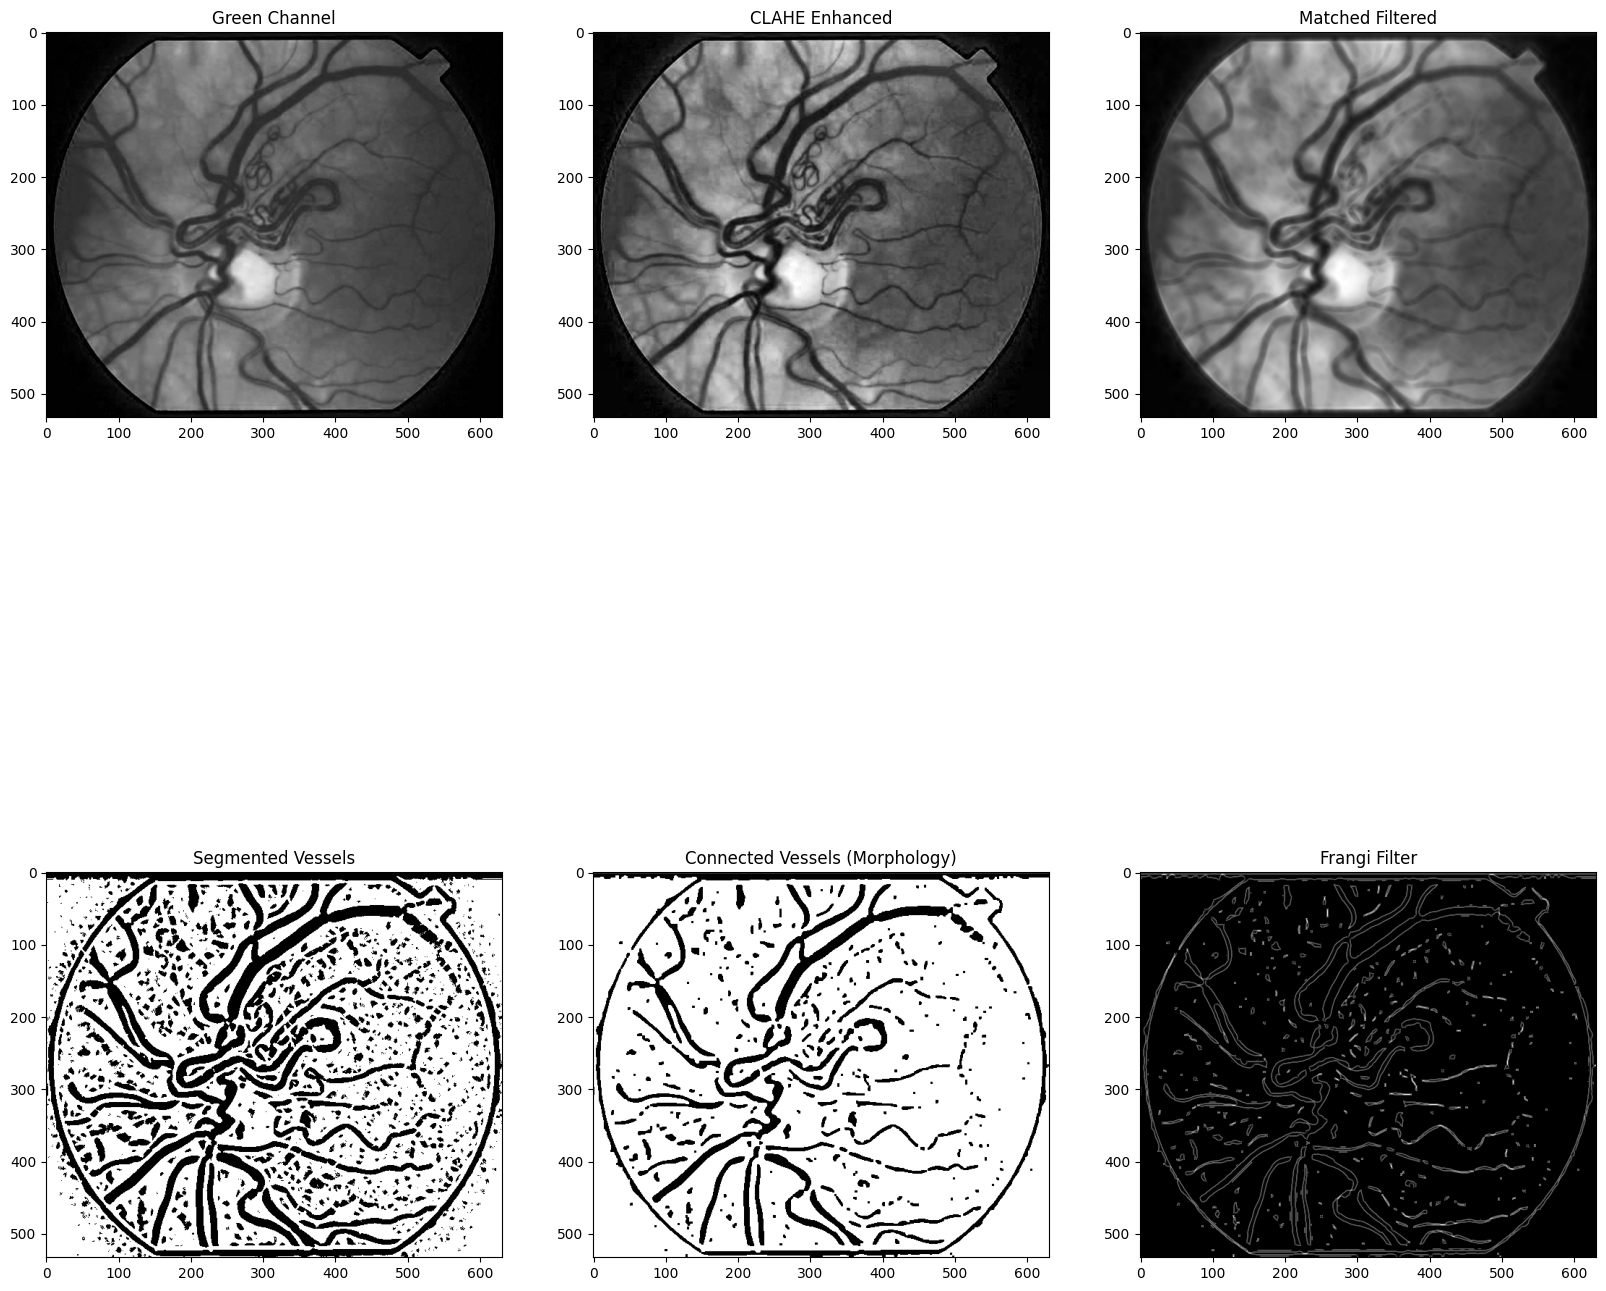

In [22]:
import cv2
import numpy as np
from skimage.filters import frangi
from matplotlib import pyplot as plt

# Load the retinal image

# Convert to grayscale and extract the green channel
green_channel = image[:, :, 1]

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_green_channel = clahe.apply(green_channel)

# Apply Gaussian Blur for noise reduction
blurred = cv2.GaussianBlur(enhanced_green_channel, (5, 5), 0)

# Matched Filtering to capture vessels with varying orientations and thickness
def matched_filter(image, kernel_sizes=[9, 15, 21], sigma=2, num_angles=24):
    filtered_images = []
    for kernel_size in kernel_sizes:
        for angle in range(num_angles):
            # Create a line filter at different angles
            theta = np.deg2rad(angle * 180 / num_angles)
            kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
            filtered_image = cv2.filter2D(image, cv2.CV_32F, kernel)
            filtered_images.append(filtered_image)
    
    # Take the maximum response across all angles and kernel sizes
    return np.max(np.array(filtered_images), axis=0)

matched_filtered_image = matched_filter(blurred)

# Normalize the image for better contrast
matched_filtered_image = cv2.normalize(matched_filtered_image, None, 0, 255, cv2.NORM_MINMAX)

# Adaptive Thresholding for vessel segmentation
vessels_segmented = cv2.adaptiveThreshold(
    matched_filtered_image.astype(np.uint8), 
    255, 
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY, 
    11, 
    2
)

# Apply morphological operations to connect small disconnected vessels
kernel = np.ones((3, 3), np.uint8)

# Dilation to widen and connect small gaps
dilated_vessels = cv2.dilate(vessels_segmented, kernel, iterations=1)

# Closing operation to connect vessels and smooth out noise
vessels_connected = cv2.morphologyEx(dilated_vessels, cv2.MORPH_CLOSE, kernel)

# Apply the Frangi filter for vessel enhancement (ridge detection)
frangi_vessels = frangi(vessels_connected)

# Normalize and convert to 8-bit for display
frangi_vessels_normalized = cv2.normalize(frangi_vessels, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Optionally apply edge detection to highlight vessel boundaries
edges = cv2.Canny(frangi_vessels_normalized, 50, 150)

# Display the results
plt.figure(figsize=(20, 20))
plt.subplot(2, 3, 1), plt.imshow(green_channel, cmap='gray'), plt.title('Green Channel')
plt.subplot(2, 3, 2), plt.imshow(enhanced_green_channel, cmap='gray'), plt.title('CLAHE Enhanced')
plt.subplot(2, 3, 3), plt.imshow(matched_filtered_image, cmap='gray'), plt.title('Matched Filtered')
plt.subplot(2, 3, 4), plt.imshow(vessels_segmented, cmap='gray'), plt.title('Segmented Vessels')
plt.subplot(2, 3, 5), plt.imshow(vessels_connected, cmap='gray'), plt.title('Connected Vessels (Morphology)')
plt.subplot(2, 3, 6), plt.imshow(frangi_vessels_normalized, cmap='gray'), plt.title('Frangi Filter')
plt.show()


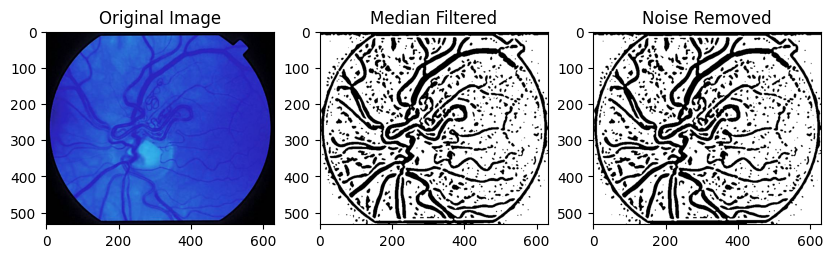

In [23]:
median_filtered = cv2.medianBlur(vessels_segmented, 5)

# Apply morphological opening (erosion followed by dilation)
kernel = np.ones((3, 3), np.uint8)
morph_opened = cv2.morphologyEx(median_filtered, cv2.MORPH_OPEN, kernel)

# Threshold the image to make it binary
_, binary_image = cv2.threshold(morph_opened, 127, 255, cv2.THRESH_BINARY)

# Remove small noise blobs by setting a minimum area threshold
# Find connected components (vessels) and remove small objects
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
min_area = 100  # Minimum area to keep the component (adjust based on your data)
filtered_image = np.zeros_like(binary_image)

for i in range(1, num_labels):  # Start from 1 to skip the background
    if stats[i, cv2.CC_STAT_AREA] >= min_area:
        filtered_image[labels == i] = 255

# Display the results
plt.figure(figsize=(10, 8))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filtered')
plt.subplot(1, 3, 3), plt.imshow(filtered_image, cmap='gray'), plt.title('Noise Removed')
plt.show()

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image (after initial noise reduction) # Path to the uploaded image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Apply median filter to remove small noise while preserving edges
median_filtered = cv2.medianBlur(image, 5)

# Step 2: Apply morphological opening (erosion followed by dilation) to further clean noise
kernel = np.ones((3, 3), np.uint8)
morph_opened = cv2.morphologyEx(median_filtered, cv2.MORPH_OPEN, kernel)

# Step 3: Threshold the image to make it binary (0: background, 255: vessels)
_, binary_image = cv2.threshold(morph_opened, 127, 255, cv2.THRESH_BINARY)

# Step 4: Remove small noise by using connected components
# Find connected components (vessels) and remove small objects
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

# Define a minimum area threshold to filter small unconnected vessels
min_area_noise = 100  # Minimum area to remove small noise components
min_area_vessels = 500  # Minimum area to remove small unconnected vessels

# Create an empty mask to store the filtered image
filtered_image = np.zeros_like(binary_image)

# Step 5: Filter small unconnected vessels and noise
for i in range(1, num_labels):  # Start from 1 to skip the background
    if stats[i, cv2.CC_STAT_AREA] >= min_area_noise:  # Remove small noise components
        if stats[i, cv2.CC_STAT_AREA] >= min_area_vessels:  # Keep larger connected vessels
            filtered_image[labels == i] = 255  # Preserve the connected vessels

# Step 6: Optional - Apply additional morphological closing to connect vessels
closing_kernel = np.ones((5, 5), np.uint8)  # Larger kernel to connect vessels
closed_image = cv2.morphologyEx(filtered_image, cv2.MORPH_CLOSE, closing_kernel)

# Display the original, intermediate, and final results
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filtered')
plt.subplot(2, 3, 3), plt.imshow(morph_opened, cmap='gray'), plt.title('Morphological Opening')
plt.subplot(2, 3, 4), plt.imshow(binary_image, cmap='gray'), plt.title('Binary Image')
plt.subplot(2, 3, 5), plt.imshow(filtered_image, cmap='gray'), plt.title('Filtered (Unconnected Removed)')
plt.subplot(2, 3, 6), plt.imshow(closed_image, cmap='gray'), plt.title('Vessels After Closing')
plt.show()


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

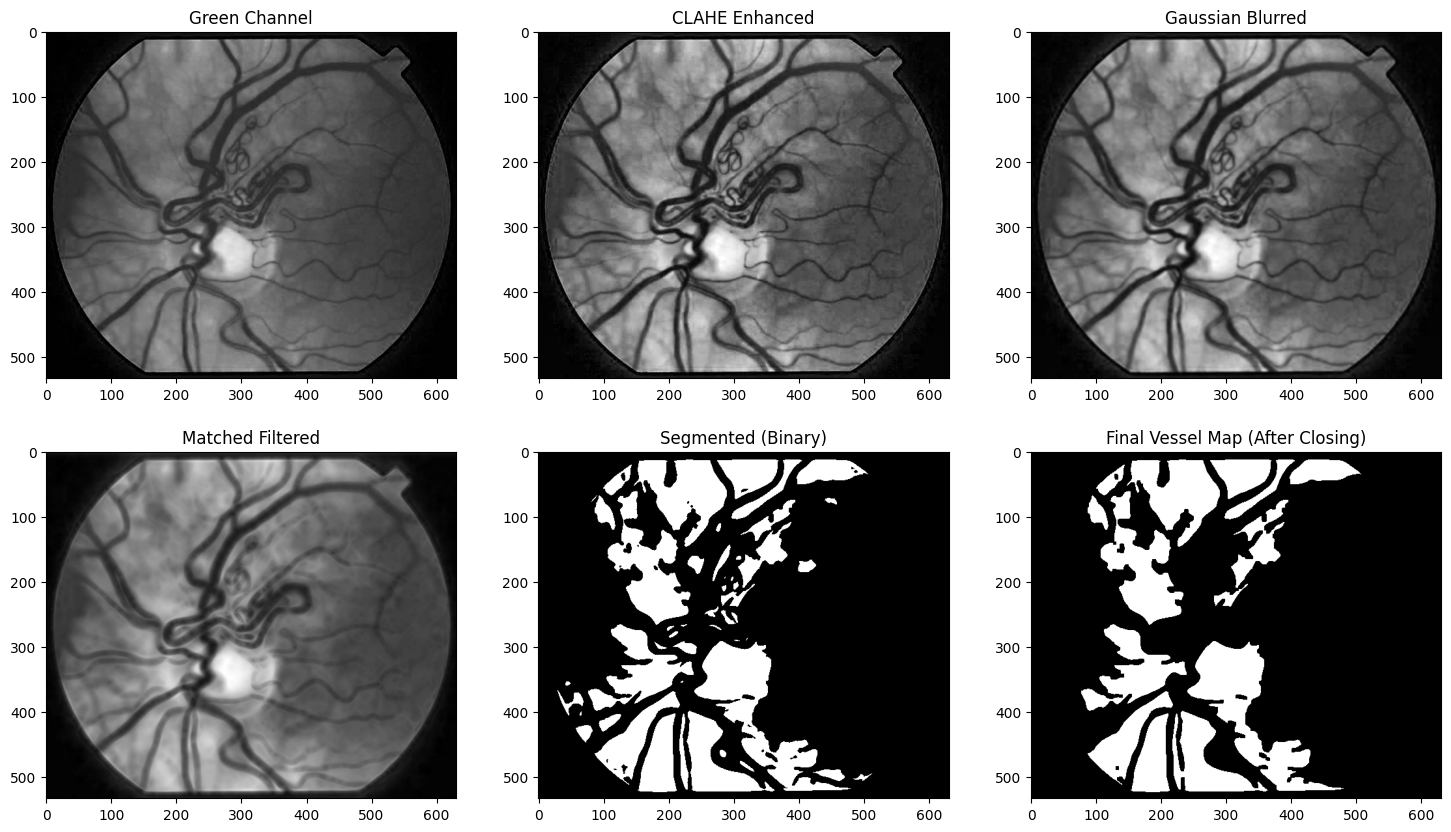

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = '/mnt/data/image.png'  # Path to the uploaded image
image = cv2.imread(image_path)

# Extract the green channel (since vessels are more pronounced here)
green_channel = image[:, :, 1]

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_green_channel = clahe.apply(green_channel)

# Step 1: Apply Gaussian Blur for noise reduction
blurred = cv2.GaussianBlur(enhanced_green_channel, (5, 5), 0)

# Step 2: Matched Filtering to capture vessels with varying orientations and thickness
def matched_filter(image, kernel_sizes=[9, 15, 21], sigma=2, num_angles=24):
    filtered_images = []
    for kernel_size in kernel_sizes:
        for angle in range(num_angles):
            # Create a line filter at different angles
            theta = np.deg2rad(angle * 180 / num_angles)
            kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
            filtered_image = cv2.filter2D(image, cv2.CV_32F, kernel)
            filtered_images.append(filtered_image)
    
    # Take the maximum response across all angles and kernel sizes
    return np.max(np.array(filtered_images), axis=0)

# Apply matched filtering
matched_filtered_image = matched_filter(blurred)

# Normalize the image for better contrast
matched_filtered_image = cv2.normalize(matched_filtered_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Step 3: Threshold the image to make it binary (segment vessels)
_, binary_image = cv2.threshold(matched_filtered_image, 127, 255, cv2.THRESH_BINARY)

# Step 4: Remove small noise by using connected components
# Find connected components (vessels) and remove small objects
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

# Define a minimum area threshold to filter small unconnected vessels
min_area_noise = 100  # Minimum area to remove small noise components
min_area_vessels = 500  # Minimum area to remove small unconnected vessels

# Create an empty mask to store the filtered image
filtered_image = np.zeros_like(binary_image)

# Filter small unconnected vessels and noise
for i in range(1, num_labels):  # Start from 1 to skip the background
    if stats[i, cv2.CC_STAT_AREA] >= min_area_noise:  # Remove small noise components
        if stats[i, cv2.CC_STAT_AREA] >= min_area_vessels:  # Keep larger connected vessels
            filtered_image[labels == i] = 255  # Preserve the connected vessels

# Step 5: Optional - Apply additional morphological closing to connect vessels
closing_kernel = np.ones((5, 5), np.uint8)  # Larger kernel to connect vessels
closed_image = cv2.morphologyEx(filtered_image, cv2.MORPH_CLOSE, closing_kernel)

# Display the original, intermediate, and final results
plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1), plt.imshow(green_channel, cmap='gray'), plt.title('Green Channel')
plt.subplot(2, 3, 2), plt.imshow(enhanced_green_channel, cmap='gray'), plt.title('CLAHE Enhanced')
plt.subplot(2, 3, 3), plt.imshow(blurred, cmap='gray'), plt.title('Gaussian Blurred')
plt.subplot(2, 3, 4), plt.imshow(matched_filtered_image, cmap='gray'), plt.title('Matched Filtered')
plt.subplot(2, 3, 5), plt.imshow(binary_image, cmap='gray'), plt.title('Segmented (Binary)')
plt.subplot(2, 3, 6), plt.imshow(closed_image, cmap='gray'), plt.title('Final Vessel Map (After Closing)')
plt.show()
